In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy import stats
import re
from scipy.stats.stats import pearsonr
#import rpy2.robjects as robjects
import random
from statsmodels.stats.multitest import fdrcorrection
import copy
from collections import Counter
import seaborn as sns
from matplotlib.patches import PathPatch
from matplotlib.path import Path
import os

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\astar\AppData\Local\Temp\ipykernel_24848\1722371918.py:8: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [2]:
#Colors
mouse = "#F2C911"
rat = "#65B0AC"
intrinsic = "#F55F00"
extrinsic = "#7D9AF4"
reinforcing = "#9B00F5"
opposing = "#F50901"
interaction = "#1E771A"

sns.set(font_scale=1.5)
sns.set_style("white")
d_ct_abrev = {"Forebrain glutamatergic progenitors":"brain.glut.prog", "Forebrain GABAergic progenitors":"brain.GABA.prog", "Intermediate progenitors":"inter.prog", "Forebrain glutamatergic neurons":"brain.glut.neu", "Forebrain GABAergic neurons":"brain.GABA.neu", "Spinal GABAergic neurons":"spine.GABA.neu", "Spinal glutamatergic neurons":"spine.glut.neu", "Chondrocytes":"chondrocyte", "Mesenchyme 0":"mesen.0", "Mesenchyme 2":"mesen.2", "Mesenchyme cycling":"mesen.cyc", "Forebrain GABAergic neurons 0":"Toss"}

#Function to convert file name to cell type
def file_to_celltype(x):
    x = x.split("/")[-1]
    x = x.replace("_GO_Molecular_Function_2023", "").replace("_GO_Biological_Process_2023", "").replace("Mesechyme", "Mesenchyme").replace("Brain_Or_2010_Div_New4_NewNorm_", "")
    x = x.replace("Mesenchymal_Or_2010_Div_New4_NewNorm_", "").replace("Chondrocyte_Or_2010_Div_New4_NewNorm_", "").replace(".csv", "").replace("_", " ").replace(" all", "")
    x = x.replace("Glutamatergic", "Forebrain glutamatergic").replace("GABAergic", "Forebrain GABAergic").replace("Spinal Forebrain", "Spinal").replace("Chondrocytes", "Chondrocyte")
    return x

plt.rcParams["font.family"] = "Arial"

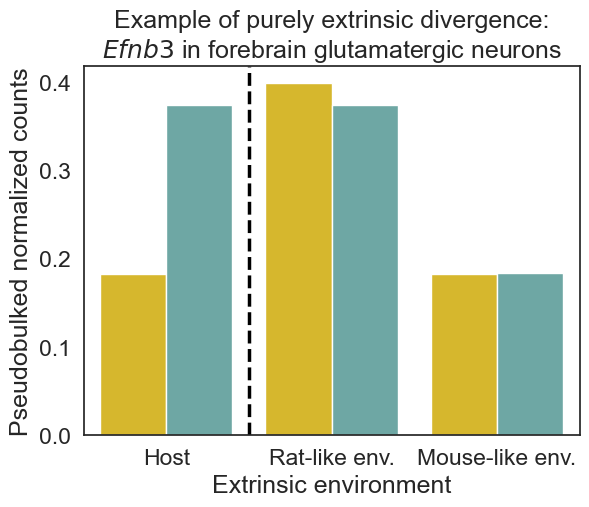

In [4]:
#Make a function to plot the various expression levels
def bp(gene, file, extra_title = ""):
    
    #Read in the file of normalized counts and divergences
    vv = pd.read_csv(file).set_index("Unnamed: 0")
    
    #Restrict to only gene of interest
    vp = vv.loc[gene]
    
    #Get the values of interest, renaming from my names to the ones in the paper that are more interpretable
    r1 = ["Rat-like env.", "Mouse", vp["MR1_mi Norm CPM"]]
    r2 = ["Rat-like env.", "Rat", vp["MR1_ri Norm CPM"]]
    r3 = ["Mouse-like env.", "Mouse", vp["RM1_mi Norm CPM"]]
    r4 = ["Mouse-like env.", "Rat", vp["RM1_ri Norm CPM"]]
    r5 = ["Mouse-like env.", "Mouse", vp["RM2_mi Norm CPM"]]
    r6 = ["Mouse-like env.", "Rat", vp["RM2_ri Norm CPM"]]
    r7 = ["Wildtype", "Mouse", vp["WT_mi Norm CPM"]]
    r8 = ["Wildype", "Rat", vp["WT_ri Norm CPM"]]
    
    #Depending on tissue, restrict to the rat-mouse chimera that had enough cells for computation
    if "Brain" in file:
        r21 = ["Host", "Rat", vp["MR1_ri Norm CPM"]]
        r31 = ["Host", "Mouse", vp["RM1_mi Norm CPM"]]
        tp = pd.DataFrame([r1, r2, r3, r4, r31, r21])
    else:
        r21 = ["Host", "Rat", vp["MR1_ri Norm CPM"]]
        r31 = ["Host", "Mouse", vp["RM2_mi Norm CPM"]]
        tp = pd.DataFrame([r31, r21, r1, r2, r6, r5])
    
    #Set column names
    tp.columns = ["Chimera (Donor-Host)", "Cell species", "Norm CPM"]
    #fig, ax = plt.subplots(figsize = (6, 4.5))
    sns.set(font_scale=1.5)
    sns.set_style("white")
    
    #Make barplot and add labels
    sns.barplot(data = tp, y = "Norm CPM", x = "Chimera (Donor-Host)", hue = "Cell species", palette = {"Mouse":mouse, "Rat":rat}, alpha = 1, order = ["Host", "Rat-like env.", "Mouse-like env."])
    plt.ylabel("Pseudobulked normalized counts")
    #plt.xlabel("Chimera (donor" + r'$\rightarrow$' + "host)")
    plt.xlabel("Extrinsic environment")
    
    #If we want a title add one
    if not extra_title:
        plt.title("Expression of $\it{" + gene + "}$ in " + file_to_celltype(file).lower())
    else:
        plt.title(extra_title + "\n$\it{" + gene + "}$ in " + file_to_celltype(file).lower())
    xmin, xmax, ymin, ymax = plt.axis()
    #plt.ylim(0, 1)
    
    #Add vertical line to demonstrate that we are showing data twice
    plt.axvline(0.5, color = "black", linewidth = 2.5, alpha = 1, linestyle="dashed")
    #plt.legend(bbox_to_anchor=(1.375, 1.05))
    plt.legend([],[], frameon=False)
    plt.show()
    return vp

file = "../Final/Div/Brain_Or_2010_Div_New4_NewNorm_Glutamatergic_neurons.csv"
#gene = "Lsm6"
#vp = bp(gene, file, "Example of purely intrinsic divergence:")
gene = "Efnb3"
vp = bp(gene, file, "Example of purely extrinsic divergence:")
#gene = "Plcxd2"
#vp = bp(gene, file, "Opposing intrinsic and extrinsic divergence:")
#gene = "Pou3f2"
#vp = bp(gene, file, "Interaction of intrinsic and extrinsic divergence:")

In [ ]:
#Make the plot to explain the plot of intrinsic/extrinsic divergence
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

#Set the color order
colors = [extrinsic, reinforcing, intrinsic, opposing, extrinsic, reinforcing, intrinsic, opposing]
#colors = [extrinsic, opposing, intrinsic, reinforcing, extrinsic, opposing, intrinsic, reinforcing]
# Create wedges of the circle
wedges, texts = ax.pie([0.05, 0.2, 0.05, 0.2, 0.05, 0.2, 0.05, 0.2], colors=colors, startangle=81, wedgeprops={'alpha':0.8})

#Add vertical and horizontal lines to separate things
plt.axvline(0, color = "black", linewidth = 2, alpha = 1)
plt.axhline(0, color = "black", linewidth = 2, alpha = 1)
plt.legend(handles = wedges, labels = ["Extrinsic", "Opposing", "Intrinsic", "Reinforcing"])

#Relabel to get the proper labels
handles = wedges
labels = ["Extrinsic", "Opposing", "Intrinsic", "Reinforcing"]
order = [2, 0, 3, 1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(1, 0.8), frameon = False)


In [ ]:
#Finding percent variance explained by intrinsic for all divergence
out = []
sns.set_style('white')

#Iterate through the cell types
for file in os.listdir("Final/Div/"):
    print(file)
    vv = pd.read_csv("Final/Div/" + file).set_index("Unnamed: 0")
    
    #Require at least 500 genes in a cell type
    if vv.shape[0] >= 500:
        
        #Get the average proportion intrinsic, extrinsic, and interaction
        prop_ins = np.sum(vv['Proportion intrinsic'])/vv.shape[0]
        prop_extr = np.sum(vv['Proportion extrinsic'])/vv.shape[0]
        prop_inter = np.sum(vv['Proportion interaction'])/vv.shape[0]

        fig, ax = plt.subplots(figsize = (6, 6))
        ax = plt.vlines(0, -7, 7, color = extrinsic, linewidths = 2.5, alpha = 0.65)
        ax = plt.hlines(0, -7, 7, color = intrinsic, linewidths = 2.5, alpha = 0.65)
        
        #Plot extrinsic and compare
        ax = sns.scatterplot(x=vv["Intrinsic"], y=vv["Extrinsic"], hue = vv["Proportion interaction"], palette = "viridis")
        
        #Set various plot things
        ax = plt.xlim(-7, 7)
        ax = plt.ylim(-7, 7)
        ax = plt.xlabel("Intrinsic log$_{2}$ fold-change")
        ax = plt.ylabel("Extrinsic log$_{2}$ fold-change")
        plt.xticks([-7, -5, -3, -1, 1, 3, 5, 7], [-7, -5, -3, -1, 1, 3, 5, 7])
        plt.yticks([-7, -5, -3, -1, 1, 3, 5, 7], [-7, -5, -3, -1, 1, 3, 5, 7])
        ct = file_to_celltype(file)
        if ct != "Chondrocyte":
            plt.title(ct)
        else:
            plt.title(ct + "s")
        #plt.legend(bbox_to_anchor=(1.325, 1))
        plt.legend([],[], frameon=False)
        #Add a title for the plot we will show
        if "Brain_Or_2010_Div_New4_NewNorm_Glutamatergic_neurons.csv" == file:
            plt.title("Forebrain glutamatergic neurons")
        plt.show()
        out.append([file, prop_ins, prop_extr, prop_inter])
df = pd.DataFrame(out)
df.columns = ["File", "Proportion intrinsic", "Proportion extrinsic", "Proportion interaction"]
#df.to_csv("Final/Proportion_IntExtInter.csv", index = False)